In [6]:
from ipstartup import *
import os
import sys
import random
import math
import numpy as np
import skimage.io
from skimage.io import imread
import matplotlib
import matplotlib.pyplot as plt

import coco
import utils
import model as modellib
import visualize

import torch

HOME = "/home/ubuntu"

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to trained weights file
# Download this file and place in the root of your
# project (See README file for details)
COCO_MODEL_PATH = os.path.join(HOME, "maskmm", "mask_rcnn_coco.pth")

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    # GPU_COUNT = 0 for CPU
    GPU_COUNT = 0
    IMAGES_PER_GPU = 1

[root:INFO]:starting (cellevents.py:36, time=16:10)


time: 5.89 ms


In [4]:
config = InferenceConfig()
model = modellib.MaskRCNN(model_dir=MODEL_DIR, config=config)
model.load_state_dict(torch.load(COCO_MODEL_PATH))
model.eval()
_

[root:INFO]:starting (cellevents.py:36, time=16:10)
/home/ubuntu/maskmm/model.py:1474: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(m.weight)


''

time: 2.79 s


[root:INFO]:starting (cellevents.py:36, time=16:10)
/home/ubuntu/maskmm/model.py:1595: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  molded_images = Variable(molded_images, volatile=True)
/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


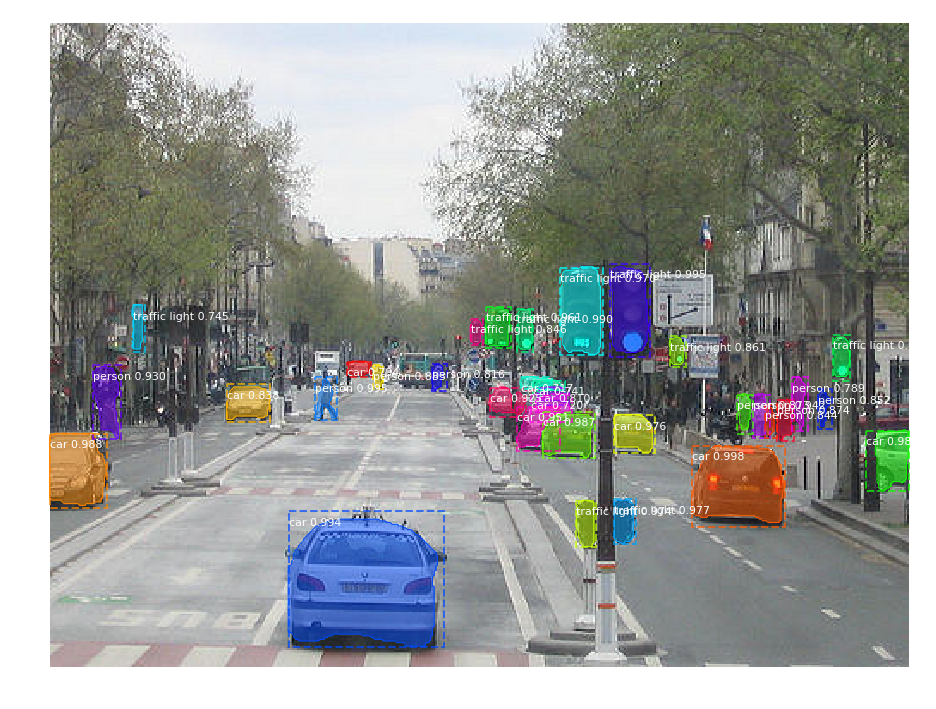

time: 55.1 s


In [7]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

image = imread('/home/ubuntu/maskpt/images/streetscene.jpg')

# Run detection
results = model.detect([image])

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])
plt.show()